In [1]:
import numpy as np
from sklearn.datasets import make_moons

In [10]:
class Neural_Network:
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        self.w1=np.random.randn(hidden_size,input_size)*0.01
        self.b1=np.zeros((hidden_size,1))
        self.w2=np.random.randn(output_size,hidden_size)*0.01
        self.b2=np.zeros((output_size,1))
    def forward(self,X):
        self.z1=np.dot(self.w1,X)+self.b1
        self.a1=np.tanh(self.z1)
        self.z2=np.dot(self.w2,self.a1)
        self.a2=self.sigmoid(self.z2)
        return self.a2
    def sigmoid(self,Z):
        return (1/(1+np.exp(-Z)))
    def back(self,X,Y):
        m=X.shape[1]
        dz2=self.a2-Y
        dw2=(1/m)*np.dot(dz2,self.a1.T)
        db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
        dz1=np.dot(self.w2.T,dz2)*(1-np.power(self.a1,2))
        dw1=(1/m)*np.dot(dz1,X.T)
        db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
        self.w1-=dw1
        self.w2-=dw2
        self.b1-=db1
        self.b2-=db2
    def train(self,X,Y,num_epochs):
        for epoch in range(num_epochs):
            predictions=self.forward(X)
            loss=self.pred_loss(predictions,Y)
            self.back(X,Y)
            if epoch%10 == 0:
                print(f"Epoch: {epoch} and loss:{loss}")
    def pred_loss(self,A,Y):
        m=Y.shape[1]
        return -(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))

In [7]:
X,Y=make_moons(n_samples=1000,noise=0.2,random_state=42)

In [8]:
X=X.T

In [11]:
Y=Y.reshape(1,-1)
nn=Neural_Network(2,4,1)
nn.train(X,Y,1000)

Epoch: 0 and loss:0.6930900316484452
Epoch: 10 and loss:0.6723617932320671
Epoch: 20 and loss:0.38724206214346235
Epoch: 30 and loss:0.3127101471822505
Epoch: 40 and loss:0.2968436653919001
Epoch: 50 and loss:0.29344602369686457
Epoch: 60 and loss:0.29257599810740736
Epoch: 70 and loss:0.29222036286988373
Epoch: 80 and loss:0.2919805415929999
Epoch: 90 and loss:0.2917744581115494
Epoch: 100 and loss:0.2915846044116936
Epoch: 110 and loss:0.29140682209209884
Epoch: 120 and loss:0.2912396990526552
Epoch: 130 and loss:0.2910823937709601
Epoch: 140 and loss:0.29093420430642214
Epoch: 150 and loss:0.2907944885038841
Epoch: 160 and loss:0.29066265026466515
Epoch: 170 and loss:0.2905381363735952
Epoch: 180 and loss:0.2904204342638884
Epoch: 190 and loss:0.29030906955958097
Epoch: 200 and loss:0.29020360349485863
Epoch: 210 and loss:0.2901036303621201
Epoch: 220 and loss:0.2900087750675802
Epoch: 230 and loss:0.2899186908253439
Epoch: 240 and loss:0.2898330569984855
Epoch: 250 and loss:0.28975

In [12]:
print(nn.w1)

[[ 0.1600255  -0.59374335]
 [ 0.16353659 -0.60630275]
 [-0.158979    0.59157444]
 [ 0.15663299 -0.59130868]]


In [13]:
print(nn.w2)

[[ 2.19976708  1.45980343 -2.30722294  2.30238505]]


In [14]:
print(nn.b1,nn.b2)

[[ 0.04608527]
 [ 0.00887084]
 [-0.06166725]
 [ 0.10887552]] [[0.13324933]]


In [15]:
from planar_utils import load_planar_dataset,plot_decision_boundary
from sklearn.linear_model import LogisticRegressionCV

In [16]:
X,Y=load_planar_dataset()

In [17]:
X.shape

(2, 400)

In [18]:
Y.shape

(1, 400)

In [19]:
print("total training examples",Y.shape[1])

total training examples 400


In [20]:
clf=LogisticRegressionCV()

In [21]:
clf.fit(X.T,Y.T)

c:\Users\sanoo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

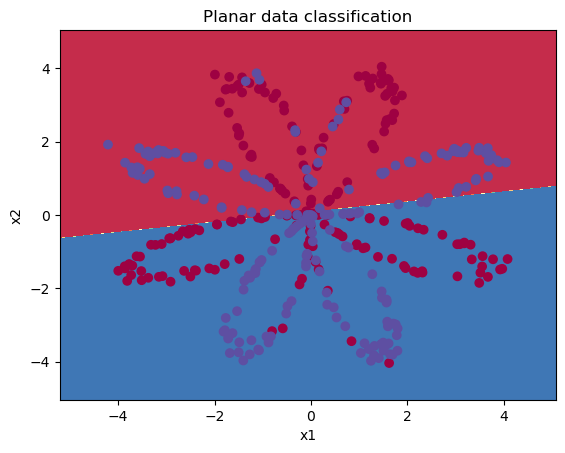

In [23]:
plot_decision_boundary(lambda x: clf.predict(x),X,Y)
import matplotlib.pyplot as plt
plt.title("Planar data classification")
plt.show()

In [25]:
A=clf.predict(X.T)

In [26]:
acc=float((np.dot(Y,A)+np.dot((1-Y),(1-A)))/float(Y.shape[1]))

In [27]:
acc

0.47

In [28]:
print(acc*100)

47.0
